In [1]:
from rdkit import Chem
from rdkit.Chem import Descriptors, Draw
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_context('talk')
sns.set_style('darkgrid', {'axis.edgecolor': '0.2',
                           'xtick.bottom': True,
                           'ytick.bottom': True,
                          })
%matplotlib inline

In [2]:
def get_num_atoms(smi):
    mol = Chem.MolFromSmiles(smi)
    return mol.GetNumAtoms()

In [3]:
def get_MW(smi):
    mol = Chem.MolFromSmiles(smi)
    return Descriptors.MolWt(mol)

In [4]:
df_train = pd.read_csv('pred_models/rf_logSolubility_preds.csv')
df_train['num_atoms'] = df_train.SMILES.apply(get_num_atoms)
df_train['molecular_weight'] = df_train.SMILES.apply(get_MW)
df_train

,SMILES,split,logSolubility_true,logSolubility_pred,num_atoms,molecular_weight
0,COc1ccc2ccc(=O)oc2c1CC=C(C)C,train,-4.314,-4.034645,18,244.290
1,COc1ncc2nccnc2n1,train,-1.110,-1.132740,12,162.152
2,CC1CC2C3CC(F)C4=CC(=O)C=CC4(C)C3(F)C(O)CC2(C)C...,train,-5.613,-4.804600,29,410.457
3,CC(=O)SC1CC2=CC(=O)CCC2(C)C2CCC3(C)C(CCC34CCC(...,train,-4.173,-4.440320,29,416.583
4,Cc1cccc2c1Cc1ccccc1-2,train,-5.220,-5.261620,14,180.250
...,...,...,...,...,...,...
1049,CC(=O)OCC(=O)C1(O)C(C)CC2C3CCC4=CC(=O)C=CC4(C)...,test,-4.900,-4.382020,31,434.504
1050,CCCCCOC(C)=O,test,-1.890,-1.701103,9,130.187
1051,CCCc1ccccc1,test,-3.370,-3.054876,9,120.195
1052,O=C(Nc1ccccc1)c1ccccc1O,test,-3.590,-3.119900,16,213.236


In [5]:
df_gen = pd.read_csv('gen_model/generated_smiles_agent.csv')
df_gen['num_atoms'] = df_gen.SMILES.apply(get_num_atoms)
df_gen['molecular_weight'] = df_gen.SMILES.apply(get_MW)
df_gen

,SMILES,inchi_key,rf_logSolubility,num_atoms,molecular_weight
0,CCCOC(=O)OCCC(=O)OO,AALFLNGIUXXXPV-UHFFFAOYSA-N,-1.190830,13,192.167
1,COOC(=O)COCC(O)CO,AAQLOBLFXDIDSM-UHFFFAOYSA-N,-1.056710,12,180.156
2,CCOC(O)OC(=O)OOC,ABYLMVPNNCULHX-UHFFFAOYSA-N,-0.856390,11,166.129
3,CCSCCOC(=O)OCO,ACXCJPNIUMOYQO-UHFFFAOYSA-N,-1.377097,11,180.225
4,CCCCOC(O)OCC(=O)OO,ADHWANDLJKTZAB-UHFFFAOYSA-N,-1.271170,13,194.183
...,...,...,...,...,...
540,CC(=O)Oc1cc([N+])nc(S)c1O,ZSJZALDBYIEXNP-UHFFFAOYSA-N,-2.047850,13,198.203
541,CCC(C)OC[SH](C)OC(=O)OOCO,ZUGVRIRIIKWQTL-UHFFFAOYSA-N,-1.504340,15,242.293
542,CCS(=O)OCOC(=O)OOC(=O)OO,ZXXUCXURVVOUNB-UHFFFAOYSA-N,-1.207530,15,244.177
543,COCCC(O)OCOC(=O)OO,ZYTQWVYHFJAIOS-UHFFFAOYSA-N,-0.861530,13,196.155


In [6]:
sns.set_style('darkgrid', {'axis.edgecolor': 'black',
                           'axes.linewidth': 2,
                           'xtick.bottom': True,
                           'ytick.bottom': True,
                          })

Visually confirm that the biasing worked i.e., the generated molecules should be drawn from a distribution that has a higher logD than the training set. The molecular weight distribution is relatively unchanged


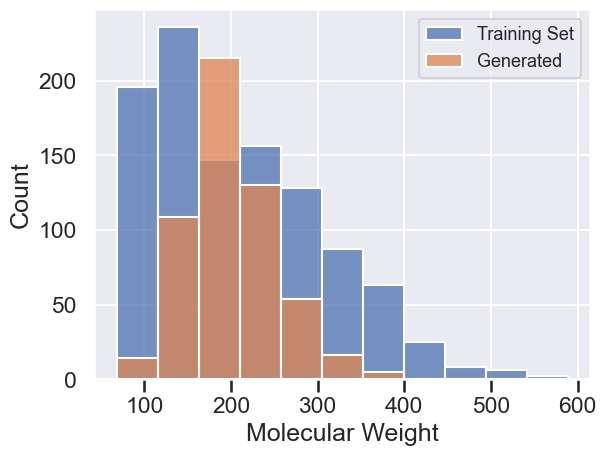

In [7]:
target = 'molecular_weight'
bins = np.histogram_bin_edges(df_train[target], bins=11)
ax = sns.histplot(x=df_train[target], bins=bins, label='Training Set')
ax = sns.histplot(x=df_gen[target], bins=bins, label='Generated')

ax.set_xlabel('Molecular Weight')
ax.set_ylabel('Count')
ax.legend(fontsize=13)
fig = ax.get_figure()

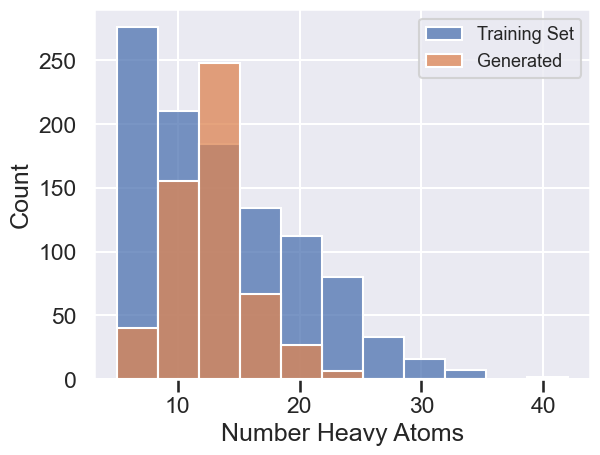

In [8]:
target = 'num_atoms'
bins = np.histogram_bin_edges(df_train[target], bins=11)
ax = sns.histplot(x=df_train[target], bins=bins, label='Training Set')
ax = sns.histplot(x=df_gen[target], bins=bins, label='Generated')

ax.set_xlabel('Number Heavy Atoms')
ax.set_ylabel('Count')
ax.legend(fontsize=13)
fig = ax.get_figure()

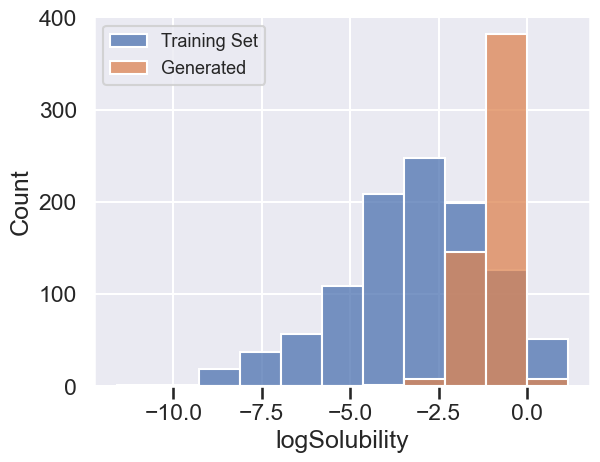

In [9]:
bins = np.histogram_bin_edges(df_train['logSolubility_true'], bins=11)
ax = sns.histplot(x=df_train['logSolubility_true'], bins=bins, label='Training Set')
ax = sns.histplot(x=df_gen['rf_logSolubility'], bins=bins, label='Generated')

ax.set_xlabel('logSolubility')
ax.set_ylabel('Count')
ax.legend(fontsize=13)
fig = ax.get_figure()

In [10]:
df_train.describe()

,logSolubility_true,logSolubility_pred,num_atoms,molecular_weight
count,1054.000000,1054.000000,1054.000000,1054.000000
mean,-3.175521,-3.170723,13.759962,209.317501
std,2.067534,1.915227,6.435469,98.190563
min,-11.600000,-10.422950,5.000000,68.075000
25%,-4.408250,-4.246647,8.000000,128.160500
50%,-3.040000,-3.023347,12.000000,191.728000
75%,-1.782500,-1.856744,18.000000,278.352500
max,1.144000,0.890822,42.000000,588.562000


In [11]:
df_gen.describe()

,rf_logSolubility,num_atoms,molecular_weight
count,545.000000,545.000000,545.000000
mean,-1.009861,12.750459,198.208372
std,0.430891,3.330469,52.437576
min,-3.912650,3.000000,60.052000
25%,-1.205530,10.000000,164.157000
50%,-0.983260,12.000000,194.183000
75%,-0.769420,15.000000,226.137000
max,0.318680,24.000000,368.338000


In [12]:
df_train['inchi_key'] = df_train.SMILES.apply(lambda smi: Chem.inchi.MolToInchiKey(Chem.MolFromSmiles(smi)))

In [13]:
df_gen[df_gen.inchi_key.isin(df_train.inchi_key.values)]

,SMILES,inchi_key,rf_logSolubility,num_atoms,molecular_weight


In [14]:
df_non_overlap = df_gen[~df_gen.inchi_key.isin(df_train.inchi_key.values)]
df_non_overlap

,SMILES,inchi_key,rf_logSolubility,num_atoms,molecular_weight
0,CCCOC(=O)OCCC(=O)OO,AALFLNGIUXXXPV-UHFFFAOYSA-N,-1.190830,13,192.167
1,COOC(=O)COCC(O)CO,AAQLOBLFXDIDSM-UHFFFAOYSA-N,-1.056710,12,180.156
2,CCOC(O)OC(=O)OOC,ABYLMVPNNCULHX-UHFFFAOYSA-N,-0.856390,11,166.129
3,CCSCCOC(=O)OCO,ACXCJPNIUMOYQO-UHFFFAOYSA-N,-1.377097,11,180.225
4,CCCCOC(O)OCC(=O)OO,ADHWANDLJKTZAB-UHFFFAOYSA-N,-1.271170,13,194.183
...,...,...,...,...,...
540,CC(=O)Oc1cc([N+])nc(S)c1O,ZSJZALDBYIEXNP-UHFFFAOYSA-N,-2.047850,13,198.203
541,CCC(C)OC[SH](C)OC(=O)OOCO,ZUGVRIRIIKWQTL-UHFFFAOYSA-N,-1.504340,15,242.293
542,CCS(=O)OCOC(=O)OOC(=O)OO,ZXXUCXURVVOUNB-UHFFFAOYSA-N,-1.207530,15,244.177
543,COCCC(O)OCOC(=O)OO,ZYTQWVYHFJAIOS-UHFFFAOYSA-N,-0.861530,13,196.155


In [15]:
MOLS = []
LEGENDS = []
for i, row in df_non_overlap.iterrows():
    mol = Chem.MolFromSmiles(row.SMILES)
    MOLS.append(mol)

    legend = f'predicted logSolubility: {row.rf_logSolubility:.2f}'
    LEGENDS.append(legend)
    if i > 20:
        break

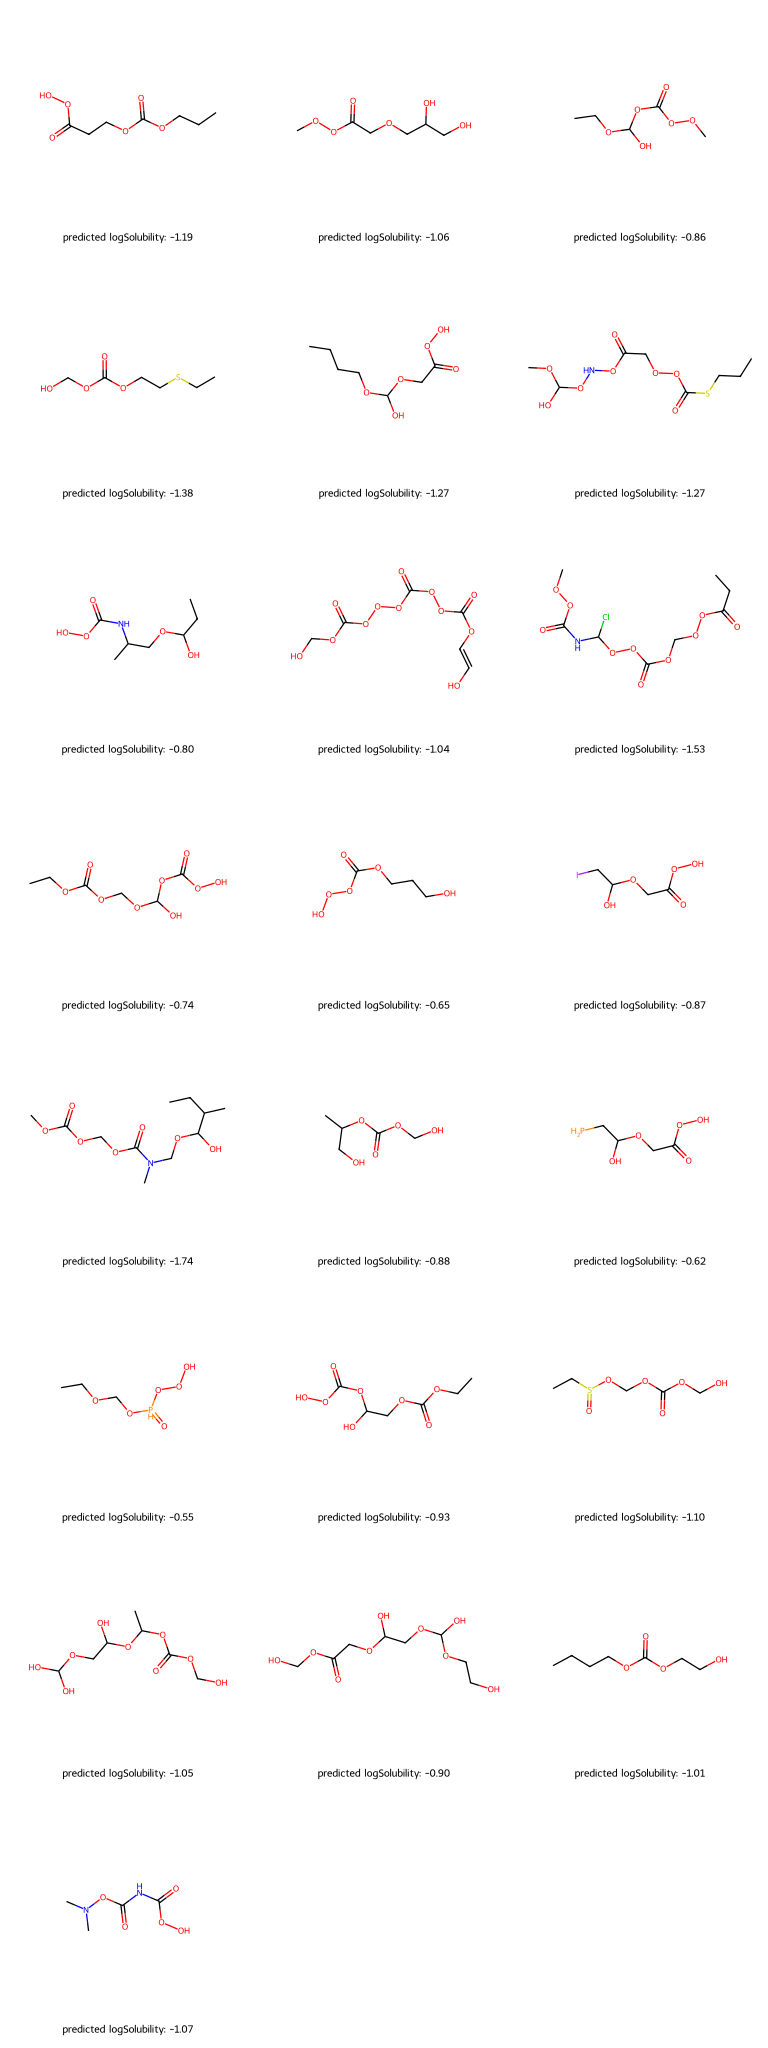

In [16]:
# inspect some of the generated molecule
size = 400
img = Draw.MolsToGridImage(MOLS,
                           legends=LEGENDS,
                           molsPerRow=3,
                           subImgSize=(size, size),
                           useSVG=True)
img